# Análisis de Datos Exploratorio en Accidentes desde 02/16 - 12/19 en EEUU

En este proyecto, importaremos un dataset de Kaggle sobre los Accidentes de tránsito ocurridos en EEUU desde el 2016 al 2019. Luego, realizaremos un análisis exploratorio de los datos enfocándono en las columnas: "City", "Start Time" y "Star Latitude & Longitude". Finalmente, detallaremos los insights hallados en este análisis.

## 1.- Importar los datos de Kaggle

In [1]:
pip install opendatasets



     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=dab4cc16d9d7e003cd71e5eec5f430b3096274da40c948be1d28589666681c45
  Stored in directory: c:\users\el-ma\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alejandrochauca
Your Kaggle Key: ········


100%|██████████| 269M/269M [00:35<00:00, 8.01MB/s] 


In [6]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## 2.- Preparación de la data

In [10]:
import pandas as pd
df = pd.read_csv(data_filename)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [13]:
numerics = ['int64' ,'float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)


14

In [14]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<AxesSubplot:>

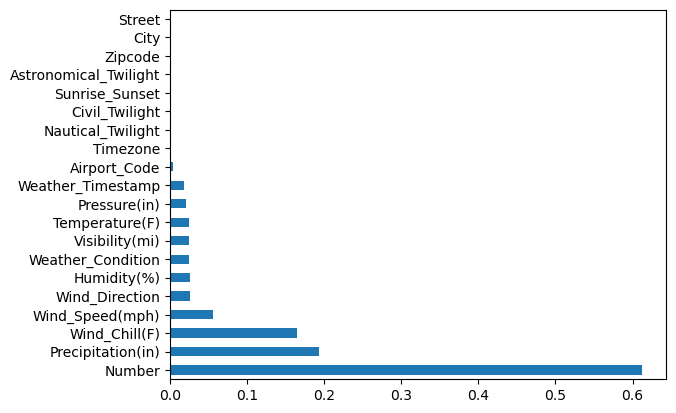

In [15]:
missing_percentages[missing_percentages != 0].plot(kind='barh')


## 3.- Análisis Exploratorio y Visualización

In [16]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### 3.1 Explorando columna 'City'

In [19]:
cities=df.City.unique()
len(cities)

11682

In [21]:
cities_by_accident=df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [22]:
cities_by_accident [:30]

Miami             106966
Los Angeles        68956
Orlando            54691
Dallas             41979
Houston            39448
Charlotte          33152
Sacramento         32559
San Diego          26627
Raleigh            22840
Minneapolis        22768
Portland           20944
Nashville          20267
Austin             18301
Baton Rouge        18182
Phoenix            17143
Saint Paul         16869
New Orleans        16251
Atlanta            15622
Jacksonville       14967
Richmond           14349
Tucson             13799
San Jose           13377
Riverside          13310
Kansas City        13298
Bakersfield        12044
San Bernardino     11249
Chicago            11188
Tampa              10984
Salt Lake City     10709
Ontario            10538
Name: City, dtype: int64

<AxesSubplot:>

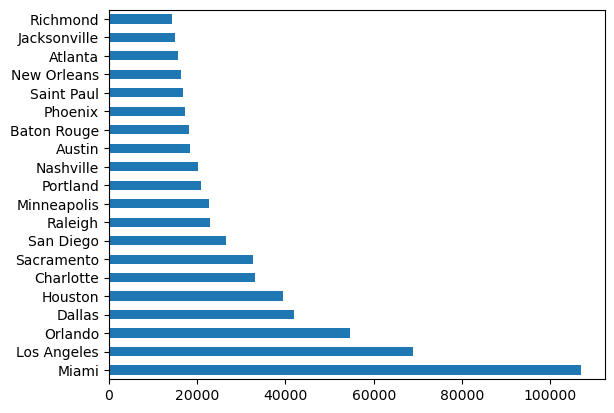

In [23]:
cities_by_accident[:20].plot(kind='barh')


In [24]:
import seaborn as sns
sns.set_style("whitegrid")

C:\Users\el-ma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

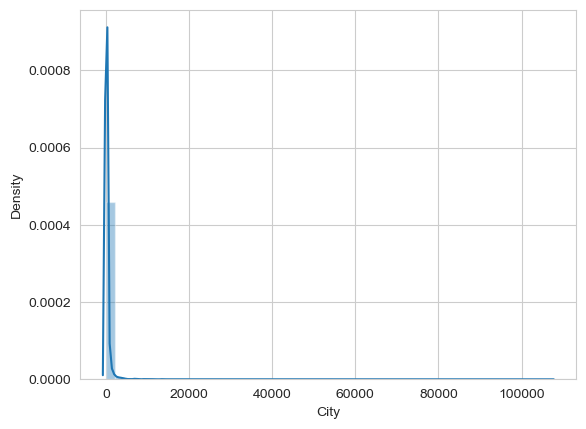

In [28]:
sns.distplot(cities_by_accident)

In [47]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]
print("% ciudades accidentes alto" ,len(high_accident_cities)/len(cities)*100,"%",
      "\n% ciudades accidentes bajo",len(low_accident_cities)/len(cities)*100,"%")



% ciudades accidentes alto 4.245848313644924 % 
% ciudades accidentes bajo 95.74559150830338 %


C:\Users\el-ma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

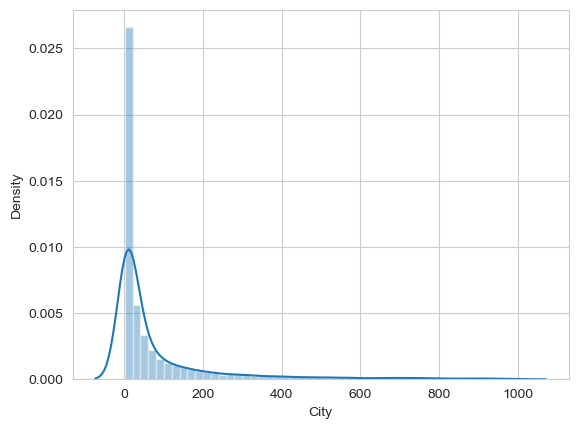

In [30]:
sns.distplot(low_accident_cties)

Por la forma del gráfico, podemos ver que la cantidad de accidentes por ciudad es tiene una distribución exponencial. Por lo que, tendrías más sentido verlo en una distribución logarítmica

<AxesSubplot:xlabel='City', ylabel='Count'>

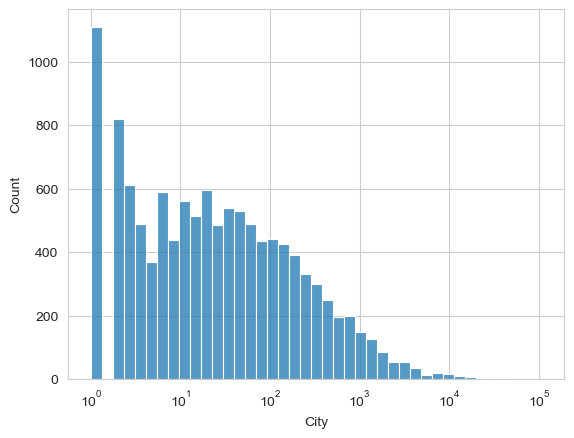

In [33]:
sns.histplot(cities_by_accident,log_scale=True)

Con el gráfico en una escala logarítmica, podemos ver que más de 1000 ciudades han reportado solo un accidente y que la mayoría de ciudades han reportado entre 10 y 100 accidentes.

### 3.2 Exporando Start Time

In [48]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

Convertimos el tipo de dato de la columna de 'Start_Time' a timestamp para poder trabajar con pandas en la data.

In [50]:
df.Start_Time = pd.to_datetime(df.Start_Time)
type(df.Start_Time)

pandas.core.series.Series

C:\Users\el-ma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

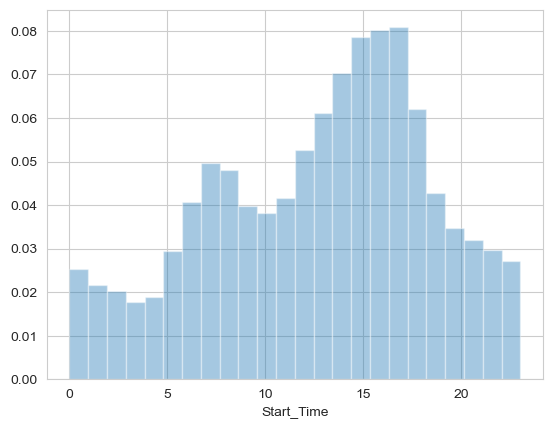

In [56]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

Un gran porcentaje de los accidentes ocurren de 1pm a 5pm (probablemente debido al pandemia y el trabajo remoto, las personas salen y vuelven de almorzar apurados)
El siguiente grande porcentaje es de 5 am a 10 am (probablemente por ir al lugar de trabajo)

<AxesSubplot:xlabel='Start_Time'>

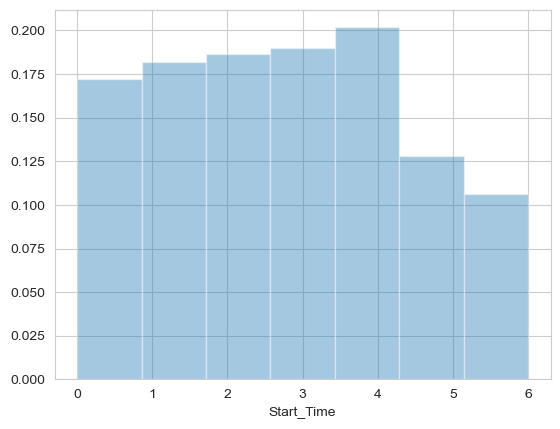

In [58]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

Vemos que hay menos cantidad de accidentes los sábados y domingos. Ahora exploraremos la hora del accidente para los fines de semana.

In [68]:
weekends_start_time=df.Start_Time.loc[((df.Start_Time.dt.dayofweek)==6)|((df.Start_Time.dt.dayofweek)==5)]
weekends_start_time.head()

147   2016-02-13 04:56:20
148   2016-02-13 07:14:41
149   2016-02-13 09:13:49
150   2016-02-13 16:00:59
151   2016-02-13 18:06:41
Name: Start_Time, dtype: datetime64[ns]

<AxesSubplot:xlabel='Start_Time'>

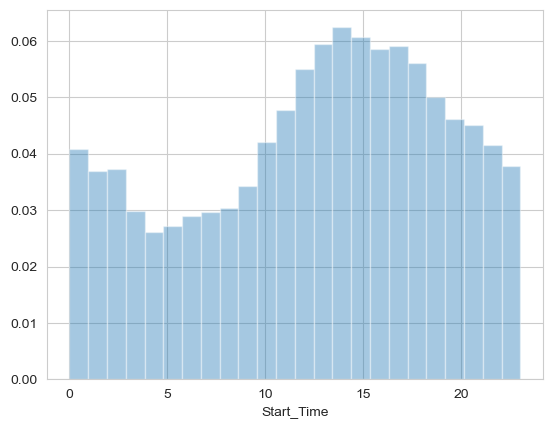

In [65]:
sns.distplot(weekends_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

C:\Users\el-ma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

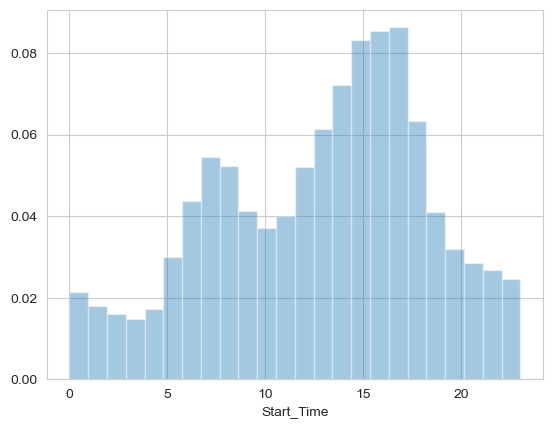

In [70]:
workdays_start_time=df.Start_Time.loc[((df.Start_Time.dt.dayofweek)!=6)&((df.Start_Time.dt.dayofweek)!=5)]
sns.distplot(workdays_start_time.dt.hour,bins=24,kde=False,norm_hist=True)


Comparando la hora de los accidentes en los días de trabajo y los fines de semana se puede observar lo siguiente:
-Hay notablemente más accidentes desde las 6pm a las 5am en los fines de semana.
-Hay ligeramente más accidentes desde las 6 am a las 10 am en los días de trabajo.

<AxesSubplot:xlabel='Start_Time'>

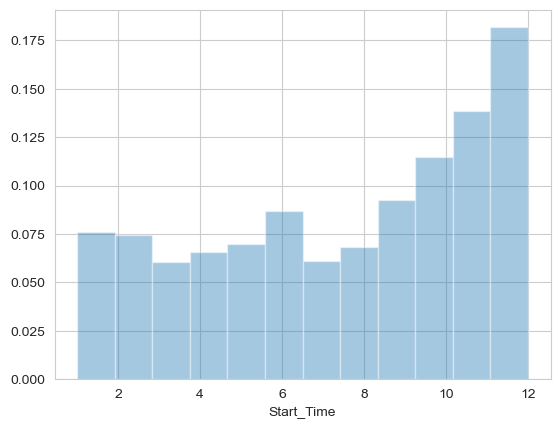

In [71]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

Parece que la mayoría de accidentes han ocurrido de octubre a diciembre. Pero antes de concluir, es pertinente verificar que la data de cada año y la fuente de donde se obtiene los datos, no esté afectando a esta tendencia.

<AxesSubplot:xlabel='Start_Time'>

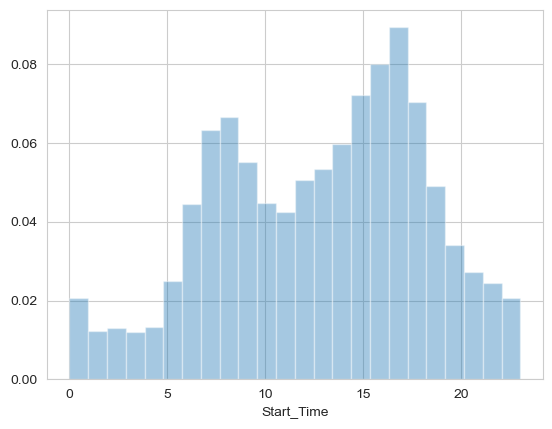

In [76]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

Desde el 2019, se ve un aumento de accidentes desde las 2pm a 6pm.

## 3.3 Star Latitude & Longitude

In [78]:
pip install folium


     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [79]:
import folium

In [80]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [81]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])


2201665    39.007436
1659872    37.318078
921258     36.128285
875417     33.968129
2171683    47.706640
             ...    
2045863    34.035354
678593     28.316947
2560402    35.559827
2139158    36.967240
2466675    45.404907
Name: Start_Lat, Length: 100, dtype: float64
2201665   -122.400980
1659872   -121.978100
921258     -86.695549
875417    -118.167499
2171683   -122.330030
              ...    
2045863   -118.328901
678593     -81.604569
2560402    -78.191181
2139158    -76.297230
2466675   -117.240021
Name: Start_Lng, Length: 100, dtype: float64


In [82]:
zip(list(df.Start_Lat), list(df.Start_Lng))


In [83]:
from folium.plugins import HeatMap



In [84]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [85]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Resumen y Conclusión

#### -Observamos que aunque New York es la ciuddad más poblada de EEUU, no ha reportes de accidentes en New York.
#### -Menos del 4% de ciudades, tuvieron más de 1000 accidentes del 2016-2019
#### -Más de 1200 ciudades han reportado solamente 1 accidente del 2016-2019.
#### -Hay notablemente más accidentes desde las 6pm a las 5am en los fines de semana. 
#### -Hay ligeramente más accidentes desde las 6 am a las 10 am en los días de trabajo.
#### -Desde el 2019, se ve un aumento de accidentes desde las 2pm a 6pm.